## Iris Dataset 
*Iris Dataset is a typical classification problem. There are three species of iris flower. when a new flower is given, we need to predict it belongs to which type. Following shows the sample of all species* :-

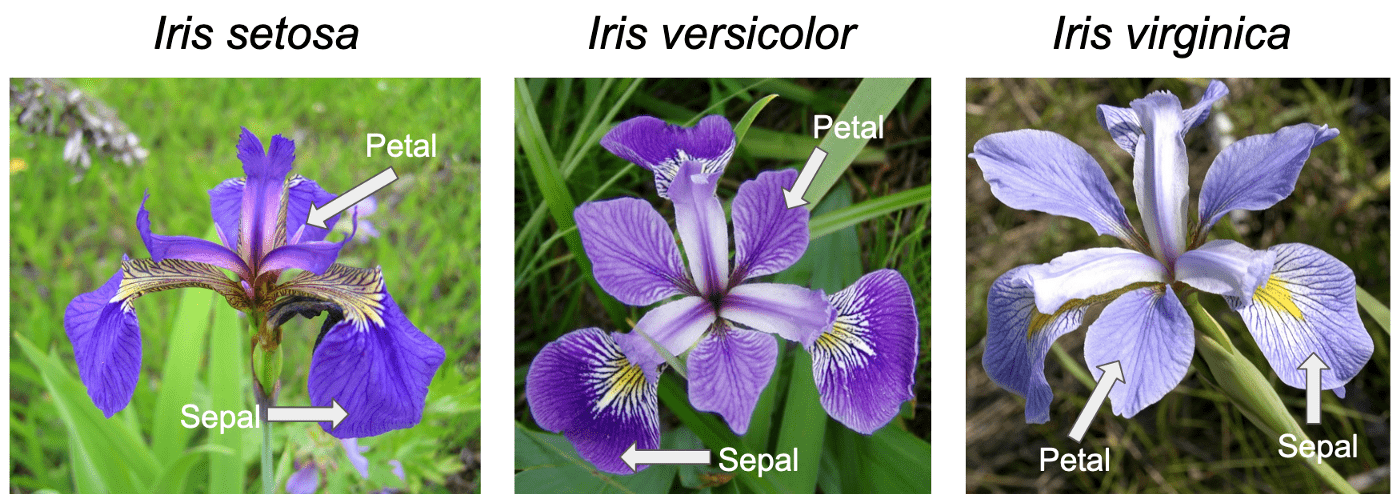

*How to extract features from these flower is a critical step.But,we dont't have to do it by image processing.Some numeric measurements are given in the iris Dataset* :-


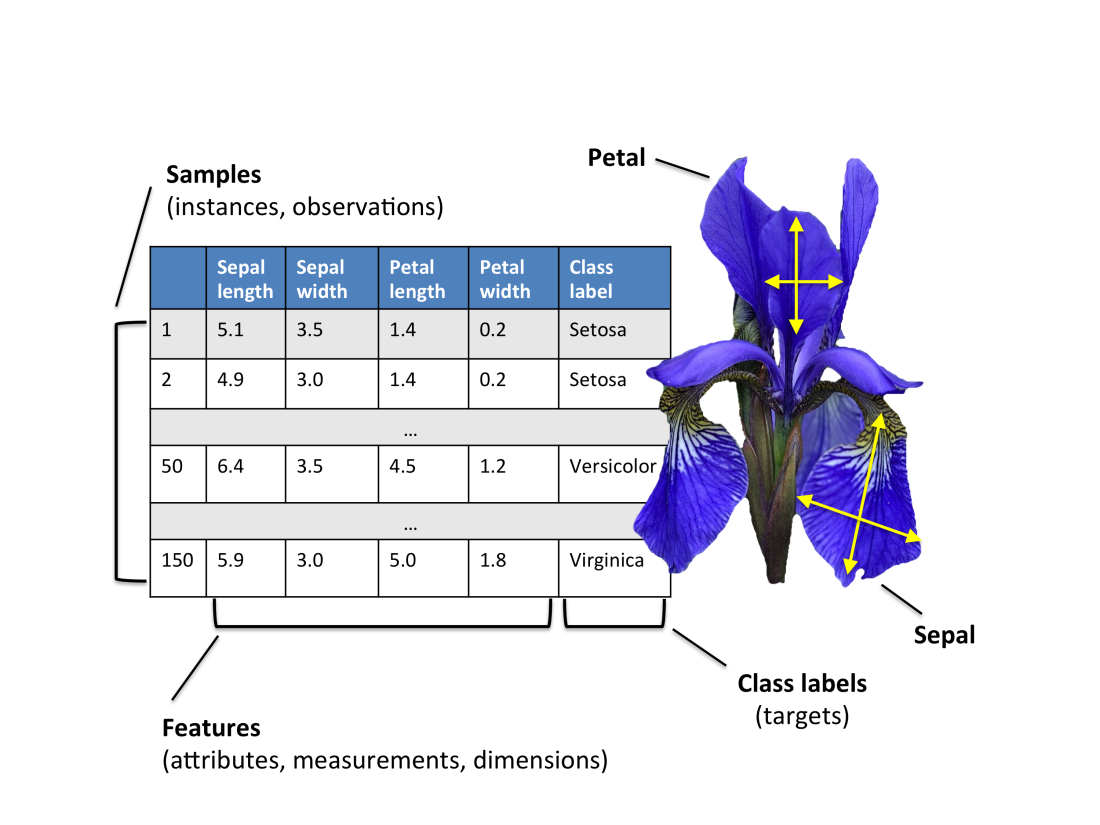

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

## import dataset 

In [2]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Scatter Plot

In [4]:
import seaborn as sns
sns.set(style="white",color_codes=True) 

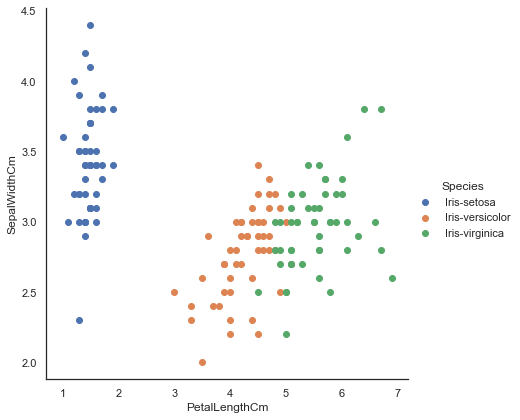

In [5]:
sns.FacetGrid(iris,hue="Species",height=6).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

 
**Converting categorical variables into number**

In [6]:
flower_mapping = {'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2}
iris['Species'] = iris['Species'].map(flower_mapping)

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Preparing Inputs and Outputs 

In [45]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = iris[['Species']].values 

## train_test_split into dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=3)    

## Linear Regression 

In [118]:
from sklearn.linear_model import LinearRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test) 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

## Save Model 

In [123]:
import pickle
pickle.dump(model,open("iris_svm.pkl","wb")) 

In [119]:
import pickle
pickle.dump(model,open("iris_linear.pkl","wb")) 

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Make Prediction 

In [55]:
y_pred = model.predict(X_test)
print(y_pred) 

[0 0 0 0 0 1 2 0 1 2 2 0 2 2 1 0 2 1 1 0 1 1 1 2 0 1 1 2 2 2]


## Accuracy

In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

100.0


### Draw a Confusion Matrix

In [52]:
from sklearn import metrics

In [53]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
print(metrics.confusion_matrix(y_test,y_pred))   

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


### Save the model 

In [69]:
import pickle
pickle.dump(model,open("iris.pkl","wb")) 

# SVM

In [122]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_model.score(X_test,y_test) 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9666666666666667

# Save Model


##  Deploy Model On Server Using Streamlit

In [124]:
%%writefile app.py 
import streamlit as st
import pickle 
from win32com.client import Dispatch
import numpy as np
from sklearn.linear_model import LogisticRegression
model = pickle.load(open('iris.pkl','rb'))
model2 = pickle.load(open('iris_linear.pkl','rb'))
model3 = pickle.load(open('iris_svm.pkl','rb'))


def predict(num):
    if num<0.5:
        speak("Iris Setosa")
        
        return "Iris-Setosa"
    elif num <1.5:
        speak("Iris Virginica")
        return 'Iris-Virginica'
    else:
        speak("Iris Versicolor")
        return 'Iris-Versicolor'
def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)

    
        

def main():
    st.title("Welcome to Iris Flower Prediction App")
    activities=['Linear Regression','Logistic Regression','SVM']
    option=st.sidebar.selectbox("Which model would you like to use ?",activities)
    st.subheader(option)
    a = st.slider(' Select Sepal Length in cm',0.0,10.0)
    b = st.slider(' Select Sepal width in cm',0.0,10.0)
    c = st.slider(' Select Petal Length in cm',0.0,10.0)
    d = st.slider(' Select Petal Width in cm',0.0,10.0)
    inputs = [[a,b,c,d]]
    if st.button("Predict"):
        if option=="Linear Regression":
            st.success(predict(model2.predict(inputs)))
        elif option=="Logistic Regression":
            st.success(predict(model.predict(inputs)))
        elif option=="SVM":
            st.success(predict(model3.predict(inputs)))
        if predict=="Iris-Setosa":
            st.image('setosa.png')
        elif predict=="Iris-Virginica":
            st.image('verginica.png')
        else:
            st.image('versicolor.png')
        
if __name__=="__main__":
    main()
        

    


Overwriting app.py


In [ ]:
!streamlit run app.py